In [45]:
import os
import pandas as pd

In [46]:
df_labels = pd.read_csv("data/medical_tc_labels.csv")
df_labels.loc[df_labels['condition_label'] == 5, 'condition_label'] = 0
df_labels

,condition_label,condition_name
0,1,neoplasms
1,2,digestive system diseases
2,3,nervous system diseases
3,4,cardiovascular diseases
4,0,general pathological conditions


In [47]:
df_balanced = pd.read_csv(os.path.join("prompts", "Balanced_GPT_input.csv"))
df_balanced = df_balanced[['medical_abstract', 'condition_label']]
df_balanced_updated = pd.merge(df_balanced, df_labels, on='condition_label')
df_balanced_updated = df_balanced_updated[['medical_abstract', 'condition_name']]
df_balanced_updated['medical_abstract'] = df_balanced_updated['medical_abstract'].str.strip()
df_balanced_updated['medical_abstract'] = df_balanced_updated['medical_abstract'].str.lower()
df_balanced_updated.shape

(100, 2)

In [48]:
df_unbalanced = pd.read_csv(os.path.join("prompts", "Unbalanced_GPT_input.csv"))
df_unbalanced = df_unbalanced[['medical_abstract', 'condition_label']]
df_unbalanced_updated = pd.merge(df_unbalanced, df_labels, on='condition_label')
df_unbalanced_updated = df_unbalanced_updated[['medical_abstract', 'condition_name']]
df_unbalanced_updated['medical_abstract'] = df_unbalanced_updated['medical_abstract'].str.strip()
df_unbalanced_updated['medical_abstract'] = df_unbalanced_updated['medical_abstract'].str.lower()
df_unbalanced_updated.sample(5)

,medical_abstract,condition_name
40,restenosis after directional coronary atherect...,general pathological conditions
74,characterization of spontaneous termination of...,cardiovascular diseases
51,clinical and hemodynamic correlates of sympath...,cardiovascular diseases
4,round fingerpad sign: an early sign of sclerod...,general pathological conditions
41,squamous cell carcinomas often produce more th...,neoplasms


In [49]:
df_unbalanced_examples = pd.read_csv(os.path.join("prompts", "Unbalanced_GPT_input_with_examples.csv"))
df_unbalanced_examples = df_unbalanced_examples[['medical_abstract', 'condition_label']]
df_unbalanced_examples_updated = pd.merge(df_unbalanced_examples, df_labels, on='condition_label')
df_unbalanced_examples_updated = df_unbalanced_examples_updated[['medical_abstract', 'condition_name']]
df_unbalanced_examples_updated['medical_abstract'] = df_unbalanced_examples_updated['medical_abstract'].str.strip()
df_unbalanced_examples_updated['medical_abstract'] = df_unbalanced_examples_updated['medical_abstract'].str.lower()
df_unbalanced_examples_updated.shape

(100, 2)

In [50]:
results_path = os.path.join("chat_gpt_output", "Balanced")
files = os.listdir(results_path)
df_balanced_output = pd.DataFrame()
files = sorted(files, key=lambda x: int(x.split(".")[0]))
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(results_path, file)
        df_file_result = pd.read_csv(file_path)
        df_balanced_output = pd.concat([df_balanced_output, df_file_result], ignore_index=True)
df_balanced_output.columns = ['medical_abstract', 'condition_name_output']
df_balanced_output['medical_abstract'] = df_balanced_output['medical_abstract'].str.strip()
df_balanced_output['medical_abstract'] = df_balanced_output['medical_abstract'].str.lower()
df_balanced_output['condition_name_output'] = df_balanced_output['condition_name_output'].str.lower()
df_balanced_output.shape

(100, 2)

In [ ]:
results_path_unbalanced = os.path.join("chat_gpt_output", "Unbalanced")
files = os.listdir(results_path_unbalanced)
df_unbalanced_output = pd.DataFrame()
files = sorted(files, key=lambda x: int(x.split(".")[0]))
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(results_path_unbalanced, file)
        df_file_result = pd.read_csv(file_path)
        df_unbalanced_output = pd.concat([df_unbalanced_output, df_file_result], ignore_index=True)
df_unbalanced_output.columns = ['medical_abstract', 'condition_name_output']
df_unbalanced_output['medical_abstract'] = df_unbalanced_output['medical_abstract'].str.strip()
df_unbalanced_output['medical_abstract'] = df_unbalanced_output['medical_abstract'].str.lower()
df_unbalanced_output['condition_name_output'] = df_unbalanced_output['condition_name_output'].str.lower()
df_unbalanced_output.shape

chat_gpt_output/Unbalanced/1.csv
chat_gpt_output/Unbalanced/2.csv
chat_gpt_output/Unbalanced/3.csv
chat_gpt_output/Unbalanced/4.csv
chat_gpt_output/Unbalanced/5.csv
chat_gpt_output/Unbalanced/6.csv
chat_gpt_output/Unbalanced/7.csv
chat_gpt_output/Unbalanced/8.csv
chat_gpt_output/Unbalanced/9.csv
chat_gpt_output/Unbalanced/10.csv


(100, 2)

In [ ]:
results_path_unbalanced_with_example = os.path.join("chat_gpt_output", "Unbalanced_with_example")
files = os.listdir(results_path_unbalanced_with_example)
df_unbalanced_output_with_examples = pd.DataFrame()
files = sorted(files, key=lambda x: int(x.split(".")[0]))
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(results_path_unbalanced_with_example, file)
        df_file_result = pd.read_csv(file_path)
        df_unbalanced_output_with_examples = pd.concat([df_unbalanced_output_with_examples, df_file_result], ignore_index=True)
df_unbalanced_output_with_examples.columns = ['medical_abstract', 'condition_name_output']
df_unbalanced_output_with_examples['medical_abstract'] = df_unbalanced_output_with_examples['medical_abstract'].str.strip()
df_unbalanced_output_with_examples['medical_abstract'] = df_unbalanced_output_with_examples['medical_abstract'].str.lower()
df_unbalanced_output_with_examples['condition_name_output'] = df_unbalanced_output_with_examples['condition_name_output'].str.lower()
df_unbalanced_output_with_examples.shape

chat_gpt_output/Unbalanced_with_example/1.csv
chat_gpt_output/Unbalanced_with_example/2.csv
chat_gpt_output/Unbalanced_with_example/3.csv
chat_gpt_output/Unbalanced_with_example/4.csv


(40, 2)

In [53]:
df_merge = pd.merge(df_balanced_updated, df_balanced_output, left_index=True, right_index=True, how='right')
df_merge.sample(3)

,medical_abstract_x,condition_name,medical_abstract_y,condition_name_output
2,multidisciplinary baseline assessment of homos...,nervous system diseases,multidisciplinary baseline assessment of homos...,nervous system diseases
38,the value of radioimmunoguided surgery in firs...,neoplasms,radioimmunoguided surgery in laparotomy for co...,neoplasms
40,effect of v1-vasopressin receptor blockade on ...,digestive system diseases,effect of v1-vasopressin receptor blockade on ...,digestive system diseases


In [54]:
df_merge_unbalanced = pd.merge(df_unbalanced_updated, df_unbalanced_output, left_index=True, right_index=True, how='right')
df_merge_unbalanced.sample(3)

,medical_abstract_x,condition_name,medical_abstract_y,condition_name_output
3,renovascular beta adrenergic hypersensitivity ...,cardiovascular diseases,renovascular beta adrenergic hypersensitivity ...,cardiovascular diseases
69,effects of intravenous immunoglobulin on hemor...,general pathological conditions,effects of intravenous immunoglobulin on hemor...,general pathological conditions
71,fasciculations due to verapamil in a patient w...,general pathological conditions,fasciculations due to verapamil in a patient w...,nervous system diseases


In [55]:
df_merge_unbalanced_with_examples = pd.merge(
    df_unbalanced_examples_updated, df_unbalanced_output_with_examples, left_index=True, right_index=True, how='inner'
)
df_merge_unbalanced_with_examples.sample(3)

,medical_abstract_x,condition_name,medical_abstract_y,condition_name_output
21,reappraisal of surgical treatment of traumatic...,general pathological conditions,reappraisal of surgical treatment of traumatic...,cardiovascular diseases
19,renal replacement treatment for diabetic patie...,general pathological conditions,renal replacement treatment for diabetic patie...,general pathological conditions
14,chest infection following head and neck surger...,general pathological conditions,chest infection following head and neck surger...,general pathological conditions


In [ ]:
from sklearn.metrics import classification_report
report_dict_balanced = classification_report(df_merge['condition_name'], df_merge['condition_name_output'])
print(report_dict_balanced)

                                 precision    recall  f1-score   support

        cardiovascular diseases       0.75      0.90      0.82        20
      digestive system diseases       0.79      0.75      0.77        20
general pathological conditions       0.50      0.40      0.44        20
                      neoplasms       0.81      0.85      0.83        20
        nervous system diseases       0.80      0.80      0.80        20

                       accuracy                           0.74       100
                      macro avg       0.73      0.74      0.73       100
                   weighted avg       0.73      0.74      0.73       100



In [ ]:
report_dict_unbalanced = classification_report(df_merge_unbalanced['condition_name'], df_merge_unbalanced['condition_name_output'])
print(report_dict_unbalanced)

                                 precision    recall  f1-score   support

        cardiovascular diseases       0.69      0.95      0.80        21
      digestive system diseases       0.69      0.90      0.78        10
general pathological conditions       0.61      0.45      0.52        31
                      neoplasms       0.80      0.73      0.76        22
        nervous system diseases       0.73      0.69      0.71        16

                       accuracy                           0.70       100
                      macro avg       0.70      0.74      0.71       100
                   weighted avg       0.70      0.70      0.69       100



In [66]:
report_dict_unbalanced = classification_report(df_merge_unbalanced_with_examples['condition_name'], df_merge_unbalanced_with_examples['condition_name_output'])
print(report_dict_unbalanced)

                                 precision    recall  f1-score   support

        cardiovascular diseases       0.64      0.78      0.70         9
      digestive system diseases       0.75      0.75      0.75         4
general pathological conditions       0.57      0.40      0.47        10
                      neoplasms       0.89      1.00      0.94         8
        nervous system diseases       0.78      0.78      0.78         9

                       accuracy                           0.72        40
                      macro avg       0.72      0.74      0.73        40
                   weighted avg       0.71      0.72      0.71        40



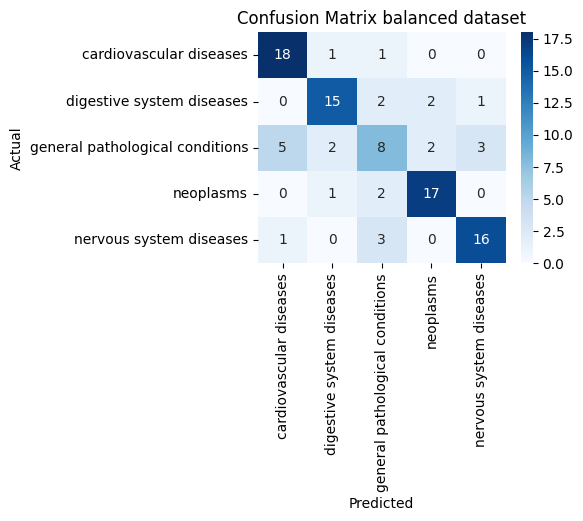

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix_df = pd.crosstab(df_merge['condition_name'], df_merge['condition_name_output'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix balanced dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

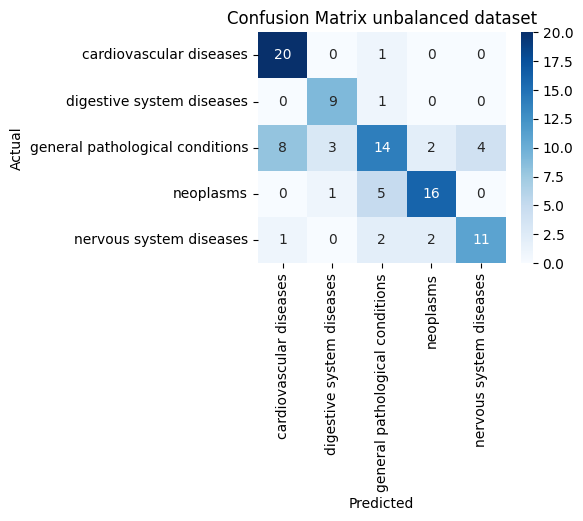

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix_df_unbalanced = pd.crosstab(df_merge_unbalanced['condition_name'], df_merge_unbalanced['condition_name_output'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_df_unbalanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix unbalanced dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

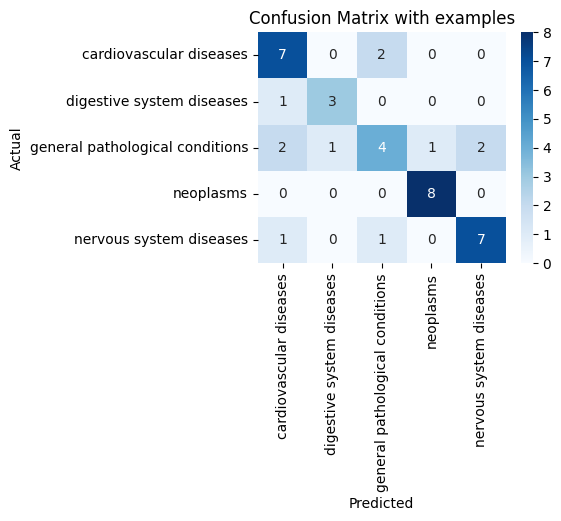

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix_df_unbalanced_examples = pd.crosstab(df_merge_unbalanced_with_examples['condition_name'], df_merge_unbalanced_with_examples['condition_name_output'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_df_unbalanced_examples, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix with examples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()